<a href="https://colab.research.google.com/github/damyaoferreyra/transferlearning/blob/master/transfer_learning_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, applications
import matplotlib.pyplot as plt

# 1. Carregar o dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


# 2. Normalizar os pixels (0 a 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"Formato das imagens: {x_train.shape}") # (50000, 32, 32, 3)

# Criar a base pré-treinada
base_model = applications.MobileNetV2(input_shape=(160, 160, 3),
                                      include_top=False,
                                      weights='imagenet')
base_model.trainable = False # Não mexer no que já está aprendido

# Adicionar a cabeça de classificação para 10 classes
model = models.Sequential([
    layers.Resizing(160, 160),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax') # 10 categorias do CIFAR
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

class_names = ['avião', 'carro', 'pássaro', 'gato', 'veado',
               'cachorro', 'sapo', 'cavalo', 'navio', 'caminhão']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Formato das imagens: (50000, 32, 32, 3)
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 31ms/step - accuracy: 0.7086 - loss: 0.8518 - val_accuracy: 0.8089 - val_loss: 0.5429
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.8043 - loss: 0.5616 - val_accuracy: 0.8145 - val_loss: 0.5240
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.8227 - loss: 0.5059 - val_accuracy: 0.8210 - val_loss: 0.5142
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.8330 - loss: 0.4664 - val_accuracy: 0.8259 - val_loss: 0.5031
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.8465 - loss: 0.4383 - val_accuracy: 0.8270 - val_loss: 0.5087
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.8524 - loss: 0.4172 - val_accuracy: 0.8307 - val_loss: 0.4984
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


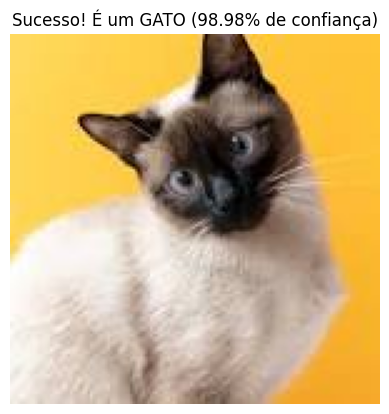

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# 1. Define o caminho da imagem e o nome do ficheiro
# Substitui 'gato.jpg' pelo nome real do teu ficheiro
caminho_imagem = '/content/IMAGES/gato02.jpg'

# 2. Carregar e preparar a imagem
# O target_size deve ser (32, 32) porque foi assim que treináos o modelo CIFAR-10
img = image.load_img(caminho_imagem, target_size=(160, 160))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalizar (igual ao treino)
img_array = np.expand_dims(img_array, axis=0) # Criar o batch (1, 32, 32, 3)

# 3. Fazer a predição
predicoes = model.predict(img_array)
indice_vencedor = np.argmax(predicoes)
probabilidade = np.max(predicoes) * 100

# 4. Usar o class_names para traduzir o resultado
nome_da_classe = class_names[indice_vencedor]

# 5. Exibir o resultado visual
plt.imshow(image.load_img(caminho_imagem)) # Mostra a imagem original, não a de 32x32
plt.axis('off')

if nome_da_classe == 'gato':
    plt.title(f"Sucesso! É um GATO ({probabilidade:.2f}% de confiança)")
else:
    plt.title(f"Ops! O modelo achou que é um {nome_da_classe} ({probabilidade:.2f}%)")

plt.show()